In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D

In [2]:
path = '/Users/zcaspar/codes/Diagnostics2/'



In [3]:
ds = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80*'))] #local

In [35]:

Te = [xr.concat([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')],dim='ybin') for d in ds]
Tl = [xr.concat([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')],dim='ybin') for d in ds]

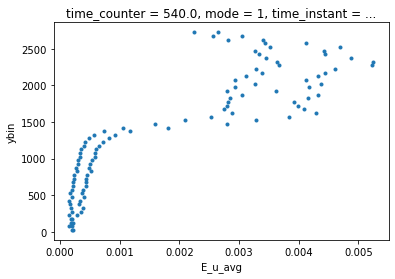

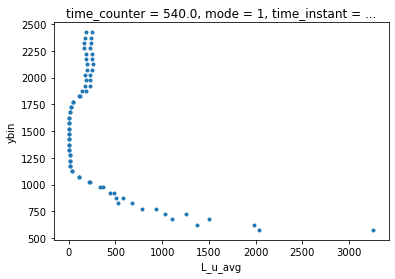

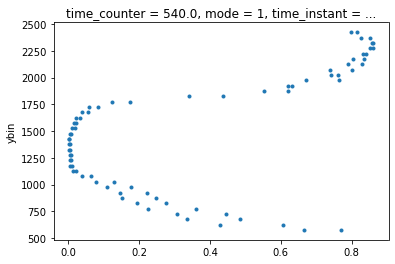

In [41]:
(1/Te[0]).plot.line('.',y='ybin')
plt.figure()
(Tl[0]).plot.line('.',y='ybin')
plt.figure()
(Tl[0]/Te[0]).plot.line('.',y='ybin')

In [42]:
def phi_mu(tau,Tbar):
    return 1-np.exp(-tau/Tbar)
def phi_sigma(tau,Tbar):
    return 1-2*(1-np.exp(-tau/Tbar))/tau+(1+np.exp(-2*tau/Tbar))/(2*tau)

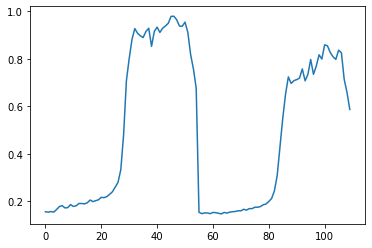

In [34]:
from scipy.stats import norm
plt.plot(norm.cdf((1/Te[0]).values, (1/Te[0]).mean(), (1/Te[0]).std()))

In [43]:
vmodes = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_waves_modes*'))] #local

In [44]:

vmodes

[<xarray.Dataset>
 Dimensions:       (mode: 4, s_w: 51, y_rho: 720)
 Coordinates:
   * y_rho         (y_rho) float32 2000.0 6000.0 10000.0 ... 2874000.0 2878000.0
     f             (y_rho) float32 ...
     f_rho         (y_rho) float32 ...
     y_u           (y_rho) float32 ...
     time_instant  float64 ...
     time_counter  float64 ...
   * mode          (mode) int64 0 1 2 3
   * s_w           (s_w) float32 -1.0 -0.98 -0.96 -0.94 ... -0.06 -0.04 -0.02 0.0
     z_w           (s_w, y_rho) float32 ...
 Data variables:
     cn            (mode, y_rho) float64 ...
     lwave         (mode, y_rho) float64 ...
     N2            (y_rho, s_w) float64 ...,
 <xarray.Dataset>
 Dimensions:       (mode: 4, s_w: 51, y_rho: 720)
 Coordinates:
   * y_rho         (y_rho) float32 2000.0 6000.0 10000.0 ... 2874000.0 2878000.0
     f             (y_rho) float32 ...
     f_rho         (y_rho) float32 ...
     y_u           (y_rho) float32 ...
     time_instant  float64 ...
     time_counter  float64 ..